### 텍스트 분석
- NLP(National Language Processing)과 텍스트 분석(Text Analysis)의 차이
 - NLP는 기계가 인간의 언어를 이해하고 해석하는데 더 중점을 두고 기술이 발전해옴 
 - 텍스트 마이닝은 비정형 텍스트에서 의미있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전해옴
 
- 텍스트 분석의 주요 발전 영역
- 1. 텍스트 분류: 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법
- 2. 감성 분석: 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등 주관적인 요소를 분석하는 기법을 통칭
- 3. 텍스트 요약: 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
- 4. 텍스트 군집화와 유사도 측정: 비슷한 유형의 문서에 대해 군집화를 수행하는 기법

### 텍스트 분석의 이해
- 비정형 데이터를 어떻게 피처 현태로 추출하고 추출된 피처에 의미있는 값을 부여하는 방법이 중요함
- 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데 이렇게 텍스트를 변환하는 것을 피처 벡터화, 피처 추출이라고함

### 텍스트 분석 수행 프로세스
- 1.텍스트 사전 준비(텍스트 전처리): 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 작업, 토큰화 작업, stop word제거, 어근 추출 등의 텍스트 정규화 작업을 통칭
- 2.피처 벡터화/ 추출: 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 벡터값을 할당, 대표적으로 BOW, Word2vec등이 있으며 BOW는 count 기반과 TF-IDF기반 벡터화가 있음
- 3.ML 모델 수립 및 학습/ 예측/ 평가: 피처 벡터화 된 데이터 세트에서 ML모델 을 적용해 학습/ 예측 및 평가를 수행함



In [4]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is every where its all around us, here even is this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxess.'

sentences = sent_tokenize(text = text_sample)
print(type(sentences),len(sentences))

<class 'list'> 3


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
print(sentences)

['The Matrix is every where its all around us, here even is this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxess.']


In [6]:
from nltk import word_tokenize
sentence = 'The Matrix is every where its all around us , here even in this room'
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'every', 'where', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room']


In [7]:
def tokenize_text(text):
    
    #문장별로 분리 토큰
    sentences = sent_tokenize(text)
    
    #분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'every', 'where', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'is', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxess', '.']]


In [8]:
nltk.download('stopwords')

print('영어 stop words 개수: ',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english'))

영어 stop words 개수:  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens=[]

#위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words=[]
    #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        #소문자로 모두 변환합니다.
        word = word.lower()
        #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
            
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'every', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxess', '.']]


### Stemming, Lemmatization
- 언어에서 문법적인 요소에 따라 단어가 변함
- 영어의 경우 과거/현재, 3인칭 단수/복수, 진행형 등등 많은 조건에 따라 원래의 단어가 변함-> 단어의 원형을 찾아야함
- Lemmatization은 stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음, 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로된 어근 단어를 찾기 때문에 Stemming보다 오래걸리지만 정확함
- Stemming은 원형 단어로 변환시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향있음


In [10]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))

work work work
amus amus amus
happy happiest


In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse
happy happy
fancy fancy


### Bag of Word
- 문서가 가지는 모든 단어(words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처값을 추출하는 모델
- 문서 내 모든 단어를 한꺼번에 봉투(Bag)에 넣은 뒤 흔들어서 섞는 다는 의미로 BOG라고함

#### 수행 과정
- 문장들에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열하고 각 단어에 고유 인덱스를 부여함 
- 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어 인덱스에 기재함

#### 한계점
- 문맥(Sementic Context) 반영 부족: BOW는 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시됨, 보완하기 위해 n_gram 기법을 활용할 수 있지만 제한적인 부분에 그치므로 문맥적 해석을 처리하지 못함 
- 희소 행렬 문제(희소성, 희소 행렬):BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움, 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어짐, 문서마다 서로 다른 단어로 구성되기때문에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많음-> 행렬의 대부분의 값이 0으로 채워지는 행렬을 희소행렬이라고함, 이와 반대로 대부분의 값이 0이 아닌 의미 있는 값으로 채워져 있는 행렬을 밀집 행렬이라고함


### count기반 벡터화, TF-IDF 벡터화
- 각 문서에서 해당 단어가 나타나는 횟수를 기반으로 행렬을 생성하는 것을 카운트 벡터화-> 문제점: 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여받게됨
- 해결하기 위해 TF-IDF기법: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티 값을 부여함


In [22]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

from scipy import sparse
data = np.array([3,1,2])

#행위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])


#sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))


In [21]:
sparse_coo.toarray()

array([[3, 0, 0],
       [0, 2, 1]])

### 20 뉴스 그룹 분류

In [26]:
from sklearn.datasets import fetch_20newsgroups

news_data= fetch_20newsgroups(subset='all',random_state=156)
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [27]:
import pandas as pd

In [29]:
print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스와 이름들 \n',news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스와 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [34]:
#subst='train'으로 학습용 데이터만 추출, remove=('headers','footers','quotes')로 내용만 추출
train_news=fetch_20newsgroups(subset='train',remove=('headers','footers','quotes'),random_state=156)
X_train = train_news.data
y_target = train_news.target

test_news = fetch_20newsgroups(subset='test',remove=('headers','footers','qoutes'),random_state=156)
X_test = test_news.data
y_test = test_news.target

In [35]:
print('학습 데이터의 크기{0},테스트 데이터의 크기{1}'.format(len(train_news.data),len(test_news.data)))

학습 데이터의 크기11314,테스트 데이터의 크기7532


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
#Count Vectorization으로 피처 벡터화 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

#학습 데이터로 fit()된 CountVectoizer를 이용해 테스트 데이터를 피처 벡터화 변환 수행
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 텍스트 데이터의 CountVectorizer shape : ',X_train_cnt_vect.shape)

학습 텍스트 데이터의 CountVectorizer shape :  (11314, 101631)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#LogisticRegression을 이용해 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_target)
pred = lr_clf.predict(X_test_cnt_vect)

print("Count_Vectorized Logistic Regression의 예측 정확도는: {0:.3f}".format(accuracy_score(y_test,pred)))

Count_Vectorized Logistic Regression의 예측 정확도는: 0.702


C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-ID 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect= tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

#LogisticRegression 을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect,y_target)
pred = lr_clf.predict(X_test_tfidf_vect)

print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.754


In [51]:
#stop words 필터링을 추가하고 ngram을 기본 (1,1)에서 (1,2)로 변경하여 피처 벡터화 적용
tfidf_vect = TfidfVectorizer(stop_words ='english',ngram_range=(1,2),max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression() 
lr_clf.fit(X_train_tfidf_vect,y_target)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 : {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Vectorized Logistic Regression의 예측 정확도는 : 0.775


In [58]:
from sklearn.model_selection import GridSearchCV
#최적 C 값 도출 튜닝 수행, CV는 3 폴드 세트로 설정
params={'C':[0.01,0.1,1,5,10]}
grid_cv_lr= GridSearchCV(lr_clf,param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_target)
print("Logistic Regression best C params:",grid_cv_lr.best_params_)

#최적 C값으로 학습된 grid_CV로 예측 및 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


KeyboardInterrupt: 

In [60]:
from sklearn.pipeline import Pipeline

#TfidfVectorizer 객체를 tfidf_vect 로 Logistic_regerssion객체를 lr_clf로 생성하는 Pipline 생성
pipeline = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,2),max_df=300)),
    ('lr_clf',LogisticRegression(C=10))
])

In [61]:
#별도의 Tfidfvectorizer 객체의 fit(), transform()과 LogisticRegression의 fit(), predict()가 필요없음
#pipeline의 fit()과 transform()만으로 한꺼번에 피처 벡터화와 ML학습/예측이 가능

pipeline.fit(X_train,y_target)
pred = pipline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 :{0:.3f}'.format(accuracy_score(y_test,pred)))

KeyboardInterrupt: 

### 감성 분석
- 문서의 주관적인 감성/ 의견/감정/ 기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론 조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용됨
- 감성 분석은 문서 내 텍스트가 나타내는 여러가진 주관적인 단어와 문맥을 기반으로 감성(Semtiment) 수치를 계산 하는 방법을 이용함
- 지도 학습과 비지도 학습으로 나뉨
    - 지도 학습: 학습 데이터와 타겟 레이블 값을 기반으로 감성 분석 학흡을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일함
    - 비지도 학습: 'Lexicon'이라는 일종의 감성 어휘 사전을 이용함. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며 이를 이용해 문서의 긍정적 부정적 감성 여부를 판단함

In [2]:
import pandas as pd

In [4]:
review_df = pd.read_csv('data/movie/labeledTrainData.tsv',header=0,sep="\t",quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [5]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [6]:
import re

#<br> html 태그는 replace 함수를 사용하여 공백으로 변환 
review_df['review']=review_df['review'].str.replace('<br \>',' ')

#파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review']= review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]"," ",x))

<ipython-input-6-6731f040b89b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  review_df['review']=review_df['review'].str.replace('<br \>',' ')


In [7]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'],axis=1,inplace=False)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [11]:
from sklearn. feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

#스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization 수행
#LogisticRegression의 C= 10
pipeline = Pipeline([
    ('cnt_vect',CountVectorizer(stop_words='english',ngram_range=(1,2))),
    ('lr_clf',LogisticRegression(C=10))])

#pipeline 객체를 이용해 fit(), predict()로 학습/예측  수행, predict_proba()는 roc_auc 때문에 수행
pipeline.fit(X_train['review'],y_train)
pred=pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),roc_auc_score(y_test,pred_probs)))

C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도는 0.886533, ROC-AUC는 0.9506


In [12]:
#스톱 워드는 englifh, filtering, ngram=(1,2)로 설정해 TF-IDF 벡터화 수행
#LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english',ngram_range=(1,2))),
    ('lr_clf',LogisticRegression(C=10))])


#pipeline 객체를 이용해 fit(), predict()로 학습/예측  수행, predict_proba()는 roc_auc 때문에 수행
pipeline.fit(X_train['review'],y_train)
pred=pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),roc_auc_score(y_test,pred_probs)))

예측 정확도는 0.893200, ROC-AUC는 0.9600


### SentiwordNet을 이용한 감성분석

In [13]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\omw-1.4.zip.
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Us

[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\pw017\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet2021.zip.
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]   

True

In [14]:
from nltk.corpus import wordnet as wn
term = 'present'

#present라는 단어로 wordnet의 synsets생성
synsets = wn.synsets(term)
print('synsets() 반환 type',type(synsets))
print('synsets() 반환 값 개수',len(synsets))
print('synsets() 반환 값',synsets)

synsets() 반환 type <class 'list'>
synsets() 반환 값 개수 18
synsets() 반환 값 [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [17]:
for synset in synsets:
    print('#### Synset name: ',synset.name(), '####')
    print('POS',synset.lexname())
    print('Definition:' ,synset.definition())
    print('Lemmas: ',synset.lemma_names())    

#### Synset name:  present.n.01 ####
POS noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas:  ['present', 'nowadays']
#### Synset name:  present.n.02 ####
POS noun.possession
Definition: something presented as a gift
Lemmas:  ['present']
#### Synset name:  present.n.03 ####
POS noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas:  ['present', 'present_tense']
#### Synset name:  show.v.01 ####
POS verb.perception
Definition: give an exhibition of to an interested audience
Lemmas:  ['show', 'demo', 'exhibit', 'present', 'demonstrate']
#### Synset name:  present.v.02 ####
POS verb.communication
Definition: bring forward and present to the mind
Lemmas:  ['present', 'represent', 'lay_out']
#### Synset name:  stage.v.01 ####
POS verb.creation
Definition: perform (a play), especially on a stage
Lemmas:  ['stage', 'present', 'represent']
#### Synset name:  p

In [18]:
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

In [20]:
entities =[tree, lion, tiger, cat, dog]
similarities =[]
entity_names=[entity.name().split('.')[0] for entity in entities]

In [21]:
#단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정함 
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity),2) for compared_entity in entities]
    similarities.append(similarity)
    
#개별 단어별 synset과 다른 단어의 synset과 유사도를 DataFrame형태로 변환함
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [23]:
import nltk
from nltk.corpus import sentiwordnet as swn
senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type:' ,type(senti_synsets))
print('senti_synsets()반환 값 개수:',len(senti_synsets))
print('senti_synsets() 반환 값: ',senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets()반환 값 개수: 11
senti_synsets() 반환 값:  [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [25]:
father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ',father.pos_score())
print('father 부정감성 지수: ',father.neg_score())
print('father 객관성 지수: ',father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous.pos_score())
print('fabulous 부정감성 지수: ',fabulous.neg_score())
print('fabulous 객관성감성 지수: ',fabulous.obj_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125
fabulous 객관성감성 지수:  0.0


### SentiwordNet을 이용한 영화 감상평 분석

- 수행 과정
- 1.문서(document)를 문장(sentence) 단위로 분해
- 2.다시 문장을 단어(word) 단위로 토큰화 하고 품사 태깅
- 3.품사 태깅된 단어 기반으로 Synset 객체와 senti_synset객체 생ㅅ성
- 4.Senti_synset에서 긍정 감성/ 부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로 그렇지 않을 때는 부정 감성으로 결정

In [26]:
from nltk.corpus import wordnet as wn

#간단한 NLTK penntreebank Tag를 기반으로 wordnet 기반의 품사 tag로 변환

def penn_to_wn(tag):
    if teg.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

In [29]:
def swn_polarity(text):
    #감성지수 초기화
    sentiment =0.0
    tokens_count= 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    
    #분해된 문장별로 단어 토큰-> 품사 태깅 후 SentiSynset 생성-> 감성 지수 합산
    for raw_sentence in raw_sentences:
        #NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            
            #word기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma =lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            #어근을 추출한 단어와 WordNet기반 품사 태깅을 입력해 Synset 객체 생성
            synsets = wn.synsets(lemma,pos=wn_tag)
            if not synsets:
                continue
            #sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            #모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment +=(swn_synset.pos_score()-swn.synset.pos_neg_score())
            tokens_count+=1
            
        if not tokens_count:
            return 0
        #총 score가 0 이상일 경우 긍정(Positive)1, 그렇지 않을 경우 부정(Negative) 0 반환
        if sentimen>=0:
            return 1
        
        return 0

In [30]:
train_df['preds']=train_df['review'].apply(lambda x: swn_polarity(x))
y_target = train_df['sentiment'].values
preds = train_df['preds'].values

NameError: name 'train_df' is not defined

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(train_df['review'][0])
print(senti_scores)

NameError: name 'train_df' is not defined

In [36]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores=analyzer.polarity_scores(review)
    
    #compund 값에 기반해 threshold 입력값 보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score>=threshold else 0
    return final_sentiment
#apply lambda 식을 이용해 레코드 별로 vader_polarity()를 수행하고 결과를 vader_preds에 저장
review_df['vader_preds']=review_df['review'].apply(lambda x: vader_polarity(x,0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도 :',np.round(accuracy_score(y_test, vader_preds),4))

NameError: name 'confusion_matrix' is not defined

### 토픽 모델링
- 문서 집합에 숨어있는 주제를 찾아내는 것으로 많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소모됨
- 머신 러닝 기반의 토픽 모델릴을 적용해 숨어있는 중요 주제를 효과적으로 찾아냄
- 자주 자용되는 기법
    - LSA(Latent Semantic Analysis):
    - LDA(Latent Dirichlet Allocation)

In [45]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토사이클, 야구, 그래픽스, 윈도우즈, 중ㅇ동, 기독교, 전자공학, 의학 8개의 주제 추출
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x','talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

#cats 변수로 기재된 카테고리만 추출 fetch_20newsgroups()의 categories에 cats입력
news_df = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'),categories=cats,random_state=0)

#LDA는 Count기반의 벡터화만 적용함
count_vect = CountVectorizer(max_df=0.95, max_features=1000,min_df=2,stop_words='english',ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)

In [46]:
print('CountVectorizer shape: ',feat_vect.shape)

CountVectorizer shape:  (7862, 1000)


In [47]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [49]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [56]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic # ',topic_index)
        
        #components_ array에서 가장 값이 큰 순으로 정렬했을 때 그 값의 array 인덱스를 반환 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        #top_indexes대상인 인덱스 별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

#CountVectorizer 객체 내의 전체 word의 명칭을 get_feeatures_names()를 통해 추출
feature_names = count_vect.get_feature_names()

#토픽별 가장 견관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic #  0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic #  1
don just like know people said think time ve didn right going say ll way
Topic #  2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic #  3
like know don think use does just good time book read information people used post
Topic #  4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic #  5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic #  6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic #  7
use dos thanks windows using window does display help like problem server need know run


In [62]:
import pandas as pd
import glob, os

path = r'C:\Users\pw017\OneDrive\바탕 화면\practice\파이썬 머신러닝\data\OpinosisDataset1.0\OpinosisDataset1.0\topics'
#path로 지정한 디렉터리 밑에 있는 모든.data파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path,"*.data"))
filename_list=[]
opinion_text=[]

#개별 파일의 파일명은 filename_list로 취합
#개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    #개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    #절대 경로로 주어진 파일명을 가공.
    #맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    
    #파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
#파일 list와 파일 내용 list객체를 DataFrame으로 생성
document_df=pd.DataFrame({'filename':filename_list,'opinion_text':opinion_text})
document_df

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...
5,buttons_amazon_kindle,...
6,comfort_honda_accord_2008,...
7,comfort_toyota_camry_2007,...
8,directions_garmin_nuvi_255W_gps,...
9,display_garmin_nuvi_255W_gps,...


In [67]:
def LemNormalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


In [70]:
def LemTokens(tokens):
    lemmer = nltk.stem.WordNetLemmatizer()
    return [lemmer.lemmatize(token) for token in tokens]

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',ngram_range=(1,2),min_df=0.05, max_df=0.85)

#opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

NameError: name 'string' is not defined

In [5]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('data/mercari/train.tsv/train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [7]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


C:\Users\pw017\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

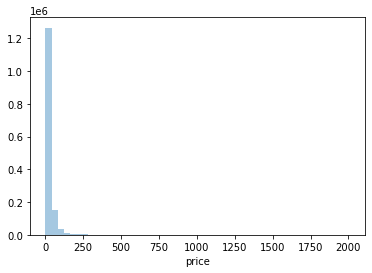

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde = False)

<AxesSubplot:xlabel='price'>

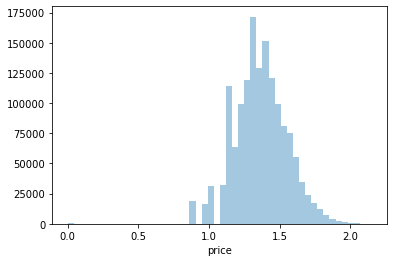

In [11]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [12]:
mercari_df['price']=np.log1p(mercari_df['price'])
mercari_df['price'].head()

0    2.397895
1    3.970292
2    2.397895
3    3.583519
4    3.806662
Name: price, dtype: float64

In [19]:
print('shipping 값 유형: \n ',mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형: \n',mercari_df['item_condition_id'].value_counts())

shipping 값 유형: 
  0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형: 
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [20]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [25]:
#apply lambda에서 호출되는 eo,wnd,th 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null','Other_Null','Other_Null']

In [26]:
#위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'],mercari_df['cat_jung'],mercari_df['cat_so']=zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

In [28]:
# 대분류만 값의 유형과 건수를 실펴보고 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형: \n', mercari_df['cat_dae'].value_counts())
print('중분류 유형: \n',len(mercari_df['cat_jung'].unique()))
print('소분류 유형: \n',len(mercari_df['cat_so'].unique()))

대분류 유형: 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 유형: 
 114
소분류 유형: 
 871


In [30]:
mercari_df['brand_name']=mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name']=mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description']=mercari_df['item_description'].fillna(value='Other_Null')

In [31]:
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

- 피처 인코딩 및 벡터화

In [32]:
print('brand name의 유형 건수: ',mercari_df['brand_name'].nunique())
print('brand name sample 5건:\n',mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수:  4810
brand name sample 5건:
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [33]:
print('name의 유형 건수: ',mercari_df['name'].nunique())
print('name sample 5건:\n',mercari_df['name'].value_counts()[:10])

name의 유형 건수:  1225273
name sample 5건:
 Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64


In [34]:
pd.set_option('max_colwidth',200)

#item_description의 평균 문자열 크기
print('item_description 평균 문자열 크기:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
#name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

#item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3),stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape: ',X_name.shape)
print('item_description vectorization shape:',X_descp.shape)

name vectorization shape:  (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


In [41]:
from sklearn.preprocessing import LabelBinarizer

#brand_name, item_condition_id, shipping 각 피처들은 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

#cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [42]:
print(type(X_brand),type(X_item_cond_id),type(X_shipping))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>


In [45]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, X_shipping,X_cat_dae,X_cat_jung, X_cat_so)

#hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse),X_features_sparse.shape)

#데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제 
del X_features_sparse
del X_deatures_sparse
gc.collect()


<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


191

In [51]:
def rmsle(y,y_pred):
    #underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))

def evaluate_org_price(y_test, preds):
    
    #원본 데이터는 log1p로 변환 되었으므로 exmpm1로 복원 필요
    preds_exmpm = np.expm1(preds)
    y_test_exmpm =np.expm1(y_test)
    
    #rmsle로 RMSLE값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [52]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    #scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()
    
    X_train,X_test,y_train,y_test = train_test_split(X, mercari_df['price'],test_size=0.2, random_state=156)
    
    #모델 학습 및 예측
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train
    gc.collect()
    
    return preds, y_test

In [54]:
linear_model =Ridge(solver = 'lsqr', fit_intercept=False)
sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)

print('Item Description을 제외했을 때 rmsle 값: ',evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 때 rmsle 값:  0.5021755915142884
Item Description을 포함한 rmsle 값: 0.4712200512893522


In [55]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.4, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model, matrix_list = sparse_matrix_list)
print('LightGBM rmsle 값:',evaluate_org_price(y_test, lgbm_preds))



LightGBM rmsle 값: 0.45438867120014803


In [56]:
preds = lgbm_preds *0.45+linear_preds*0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle값 : ',evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle값 :  0.450829656324383
